In [1]:
import os
import astropy
import numpy as np
from astropy.table import Table
import glob
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D

In [2]:
directory = r"C:\Users\20xha\Documents\Caltech\Research\SNID\snid_outputs\\"
final_rcf_table = Table.from_pandas(pd.read_hdf("C:/Users/20xha/Documents/Caltech/Research/final_rcf_table.h5"))
SEDM_ML_sample = Table.read("C:/Users/20xha/Documents/Caltech/Research/SEDM_ML_sample.ascii", format = "ascii")
run_list = os.listdir(r"C:\Users\20xha\Documents\Caltech\Research\SNID\snid_outputs/")[3::]

In [3]:
Table_List_Numpy = np.load("SNID_results_rlap3.npy", allow_pickle=True)

In [4]:
len(Table_List_Numpy)

614

In [5]:
len(final_rcf_table)

764

In [6]:
Max = 0
Min = 100
for i in Table_List_Numpy:
    Temp_Max = np.max(i[1]["rlap"])
    Temp_Min = np.min(i[1]["rlap"])
    if(Temp_Max > Max):
        Max = Temp_Max
    if(Temp_Min < Min):
        Min = Temp_Min

In [7]:
ranges = np.linspace(0, 25, 100)

In [8]:
ResultsTable_List_rlap = []
count = 0

for i in ranges:
    ResultsTable = Table(
                    names=("ZTF_Name", "Closest"
                    ),
                    meta={"name": "Spectrum Results after SNID"},
                    dtype=("U64", "U64"
                          )
                    )
    for j in Table_List_Numpy:
        row = []
        row.append(j[0])
        if(np.max(j[1]["rlap"]) > i):
            row.append(j[1][0]["type"])
            ResultsTable.add_row(row)
    
    count += 1
    if(len(ResultsTable) != 0):
        ResultsTable_List_rlap.append([i,ResultsTable])
    if(count% 100 == 0):
        print(count)

100


In [9]:
counters_rlap = [] 
for i in ResultsTable_List_rlap:
    counter = 0
    wrong = []
    JoinedResults = astropy.table.join(i[1], final_rcf_table)
    for j in JoinedResults:
        correct_1a = "Ia" in j["sn_type"]
        classified_1a = "Ia" in j["Closest"]
        if(correct_1a==classified_1a):
            counter += 1
        else:
            wrong.append([j["ZTF_Name"], j["sn_type"], j["Closest"]])
    wrong = np.asarray(wrong)
    counters_rlap.append([i[0],counter,len(JoinedResults), wrong])

In [10]:
counters_rlap = np.asarray(counters_rlap)

Text(0, 0.5, 'accuracy')

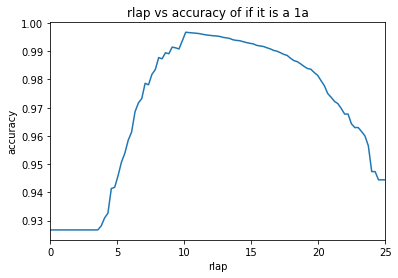

In [11]:
plt.plot(counters_rlap[:,0], counters_rlap[:,1]/counters_rlap[:,2])
plt.xlim(0, 25)
plt.title("rlap vs accuracy of if it is a 1a")
plt.xlabel("rlap")
plt.ylabel("accuracy")

In [12]:
low_rlap = np.where(counters_rlap[:,0] < 20)
counters_rlap[low_rlap][np.argmax(counters_rlap[low_rlap][:,1]/counters_rlap[low_rlap][:,2])]

array([10.101010101010102, 304, 305,
       array([['ZTF18abtogdl', 'Ia', 'II-pec']], dtype='<U12')],
      dtype=object)

In [13]:
counters_rlap_1a = [] 
for i in ResultsTable_List_rlap:
    truepositive = 0
    falsepositive = 0
    conditionpositive = 0
    conditionnegative = 0
    JoinedResults = astropy.table.join(i[1], final_rcf_table)
    
    for j in JoinedResults:
        correct_1a = "Ia" in j["sn_type"]
        classified_1a = "Ia" in j["Closest"]
        if(correct_1a and classified_1a):
            truepositive += 1
        elif(correct_1a == False and classified_1a == True):
            falsepositive += 1
    counters_rlap_1a.append([i[0],truepositive/(truepositive + falsepositive),falsepositive/(truepositive + falsepositive),len(JoinedResults)])

In [14]:
counters_rlap_1a = np.asarray(counters_rlap_1a)

Text(0, 0.5, 'True Positive Rate')

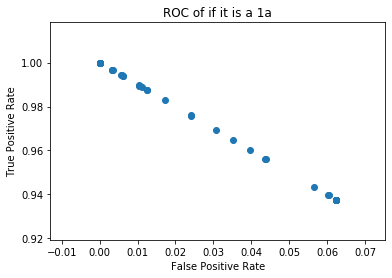

In [15]:
plt.scatter(counters_rlap_1a[:,2], counters_rlap_1a[:,1])
plt.title("ROC of if it is a 1a")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [16]:
ResultsTable_List_top15 = []
count = 0

for i in range(0,16):
    ResultsTable = Table(
                    names=("ZTF_Name", "Top15"
                    ),
                    meta={"name": "Spectrum Results after SNID"},
                    dtype=("U64", "U64"
                          )
                    )
    for j in Table_List_Numpy:
        row = []
        row.append(j[0])
        Top15 = j[1][0:15]
        c = Counter(Top15["type"])
        if(c.most_common()[0][1] >= i):
            row.append(c.most_common()[0][0])
            ResultsTable.add_row(row)
    
    count += 1
    if(len(ResultsTable) != 0):
        ResultsTable_List_top15.append([i,ResultsTable])
    if(count% 100 == 0):
        print(count)

In [17]:
counters_top15 = [] 
for i in ResultsTable_List_top15:
    counter = 0
    wrong = []
    JoinedResults = astropy.table.join(i[1], final_rcf_table)
    for j in JoinedResults:
        correct_1a = "Ia" in j["sn_type"]
        classified_1a = "Ia" in j["Top15"]
        if(correct_1a==classified_1a):
            counter += 1
        else:
            wrong.append([j["ZTF_Name"], j["sn_type"], j["Top15"]])
    wrong = np.asarray(wrong)
    counters_top15.append([i[0],counter,len(JoinedResults), wrong])

In [18]:
counters_top15 = np.asarray(counters_top15)

Text(0, 0.5, 'accuracy')

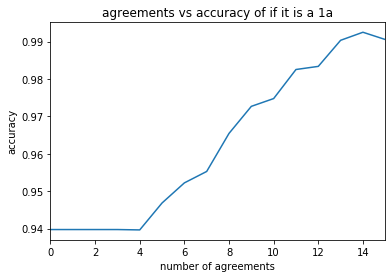

In [19]:
plt.plot(counters_top15[:,0], counters_top15[:,1]/counters_top15[:,2])
plt.xlim(0, 15)
plt.title("agreements vs accuracy of if it is a 1a")
plt.xlabel("number of agreements")
plt.ylabel("accuracy")

In [20]:
counters_top15[np.argmax(counters_top15[:,1]/counters_top15[:,2])]

array([14, 265, 267,
       array([['ZTF18abzscns', 'II', 'Ia-norm'],
       ['ZTF18acpsrtc', 'IIn', 'Ia-norm']], dtype='<U12')], dtype=object)

In [21]:
counters_top15_1a = [] 
for i in ResultsTable_List_top15:
    truepositive = 0
    falsepositive = 0
    conditionpositive = 0
    conditionnegative = 0
    JoinedResults = astropy.table.join(i[1], final_rcf_table)
    
    for j in JoinedResults:
        correct_1a = "Ia" in j["sn_type"]
        classified_1a = "Ia" in j["Top15"]
        if(correct_1a and classified_1a):
            truepositive += 1
        elif(correct_1a == False and classified_1a == True):
            falsepositive += 1
    counters_top15_1a.append([i[0],truepositive/(truepositive + falsepositive),falsepositive/(truepositive + falsepositive),len(JoinedResults)])

In [22]:
counters_top15_1a = np.asarray(counters_top15_1a)

Text(0, 0.5, 'True Positive Rate')

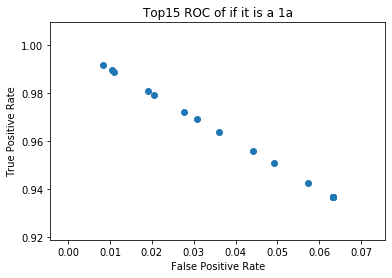

In [23]:
plt.scatter(counters_top15_1a[:,2], counters_top15_1a[:,1])
plt.title("Top15 ROC of if it is a 1a")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [ ]:
ResultsTable_List_both = []
count = 0

for rlap in ranges:
    for agree in range(0,16):
        ResultsTable = Table(
                    names=("ZTF_Name", "Both"
                    ),
                    meta={"name": "Spectrum Results after SNID"},
                    dtype=("U64", "U64"
                          )
                    )
        for j in Table_List_Numpy:
            row = []
            row.append(j[0])
            if(np.max(j[1]["rlap"]) > rlap):
                Top15 = j[1][0:15]
                c = Counter(Top15["type"])
                if(c.most_common()[0][1] >= agree):
                    row.append(c.most_common()[0][0])
                    ResultsTable.add_row(row)

        count += 1
        if(len(ResultsTable) != 0):
            ResultsTable_List_both.append([rlap,agree,ResultsTable])
        if(count% 100 == 0):
            print(count)

100
200
300
400
500


In [ ]:
counters_both = [] 
for i in ResultsTable_List_both:
    counter = 0
    wrong = []
    JoinedResults = astropy.table.join(i[2], final_rcf_table)
    for j in JoinedResults:
        correct_1a = "Ia" in j["sn_type"]
        classified_1a = "Ia" in j["Both"]
        if(correct_1a==classified_1a):
            counter += 1
        else:
            wrong.append([j["ZTF_Name"], j["sn_type"], j["Both"]])
    wrong = np.asarray(wrong)
    counters_both.append([i[0],i[1],counter,len(JoinedResults), wrong])

In [ ]:
counters_both = np.asarray(counters_both)

In [ ]:
low_rlap = np.where(counters_both[:,0] < 20)
counters_both[low_rlap][np.argmax(counters_both[low_rlap][:,2]/counters_both[low_rlap][:,3])]

In [ ]:
counters_both[np.where(counters_both[:,2] == counters_both[:,3])]

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(counters_both[:,0], counters_both[:,1], counters_both[:,2]/counters_both[:,3])
ax.set_xlabel("rlap")
ax.set_ylabel("agreements")
ax.set_zlabel("accuracy")